# Task 2 - Fraud Transaction Detection

Use a dataset of credit card transactions and build a model that can identify potentially fraudulent transactions

Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree

In [2]:
os.chdir("C:\\Users\\AFIFA\\Downloads\\Fraud1\\")
os.getcwd()

'C:\\Users\\AFIFA\\Downloads\\Fraud1'

Load the dataset

In [3]:
data = pd.read_csv('creditcard.csv')

# Data visualization

Exploratory Data Analysis

Visualize the data to understand patterns and distributions

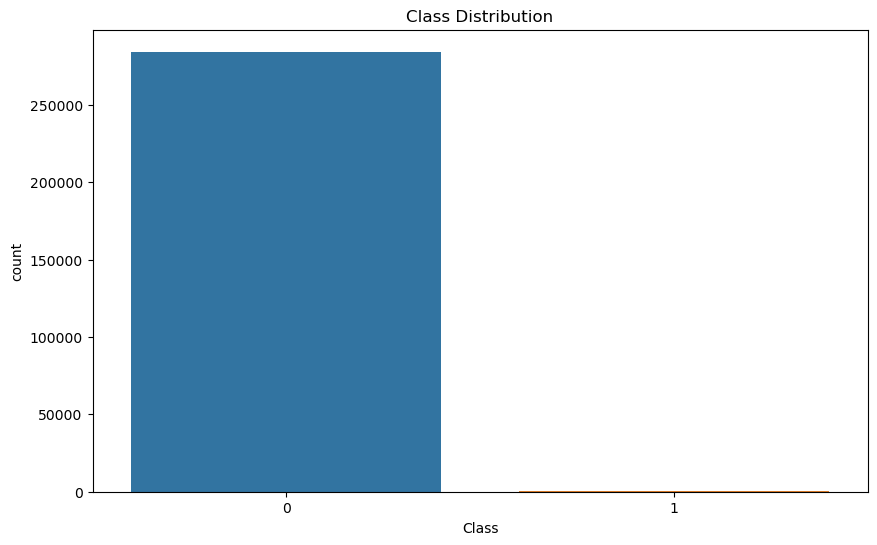

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

Visualize the distribution of transaction amounts for each class

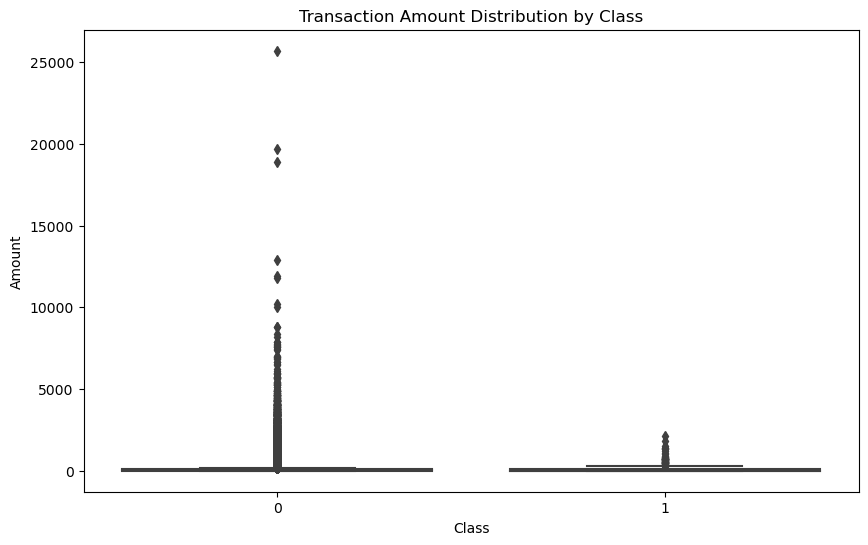

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount Distribution by Class')
plt.show()

Compare the distribution of transaction time for each class

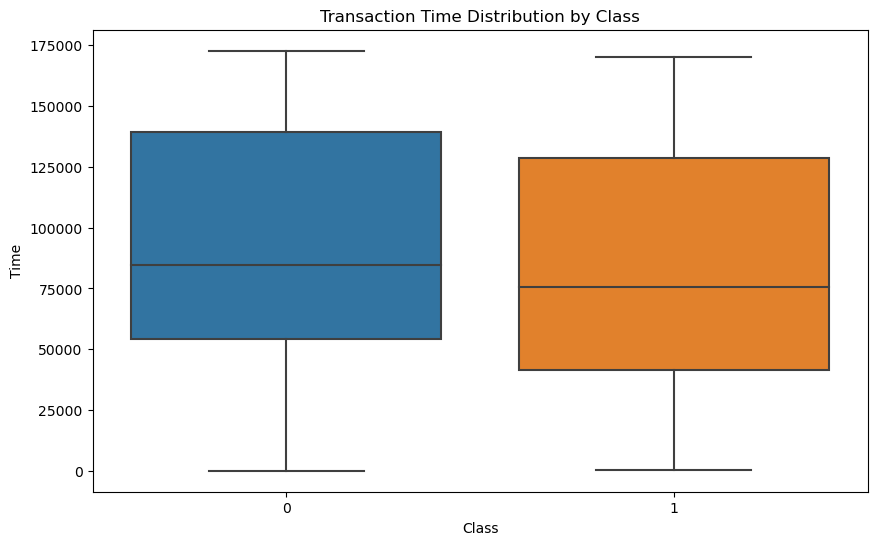

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=data)
plt.title('Transaction Time Distribution by Class')
plt.show()

Visualize the correlation matrix

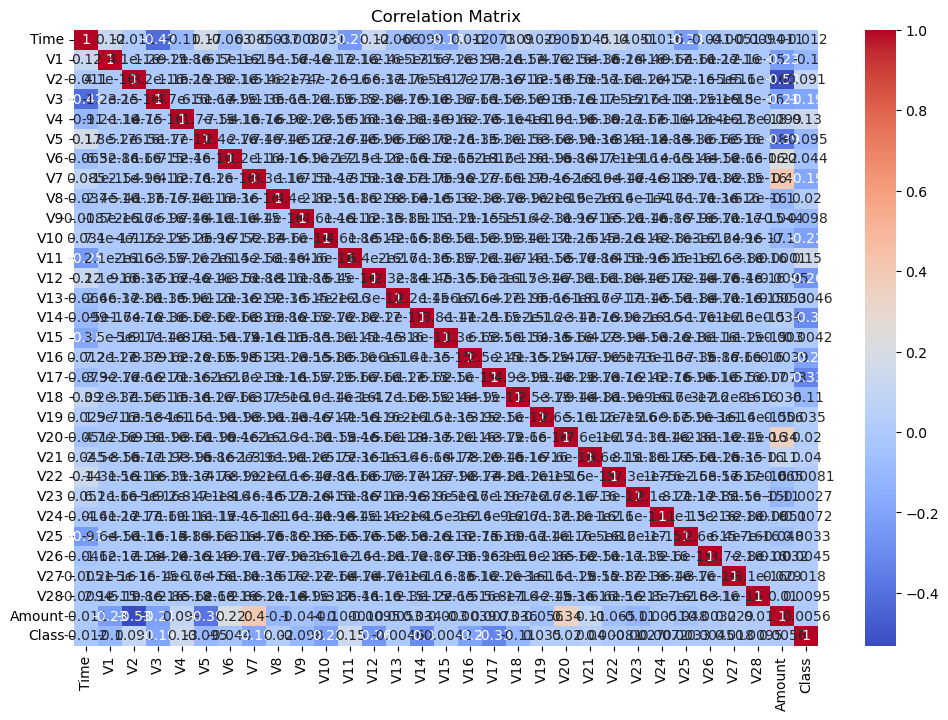

In [7]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

Model Selection

In [8]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1)

Model Evaluation

In [10]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Visualization of Confusion Matrix

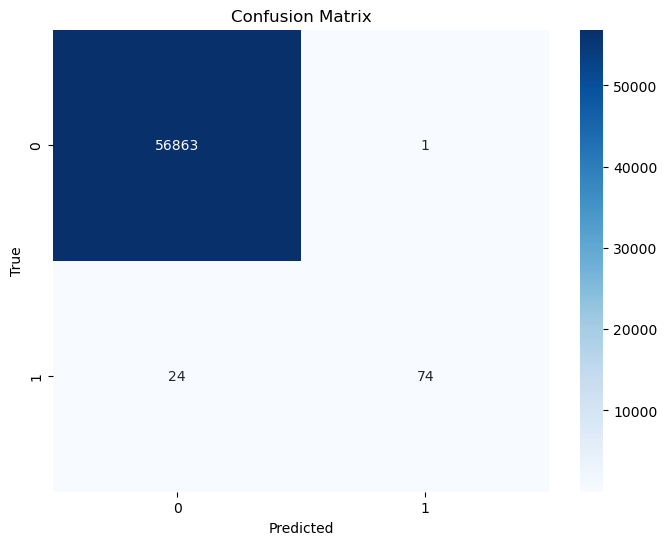

In [11]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [12]:
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)

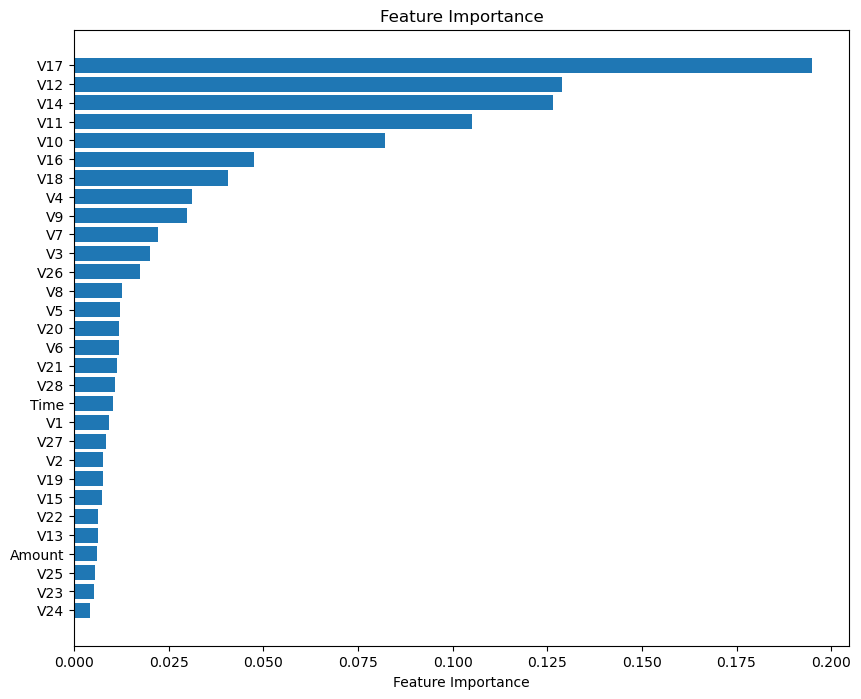

In [13]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

ROC AUC Score

We calculate the ROC AUC score to evaluate the model's performance.

In [14]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8775422274987654


Visualize one of the decision trees

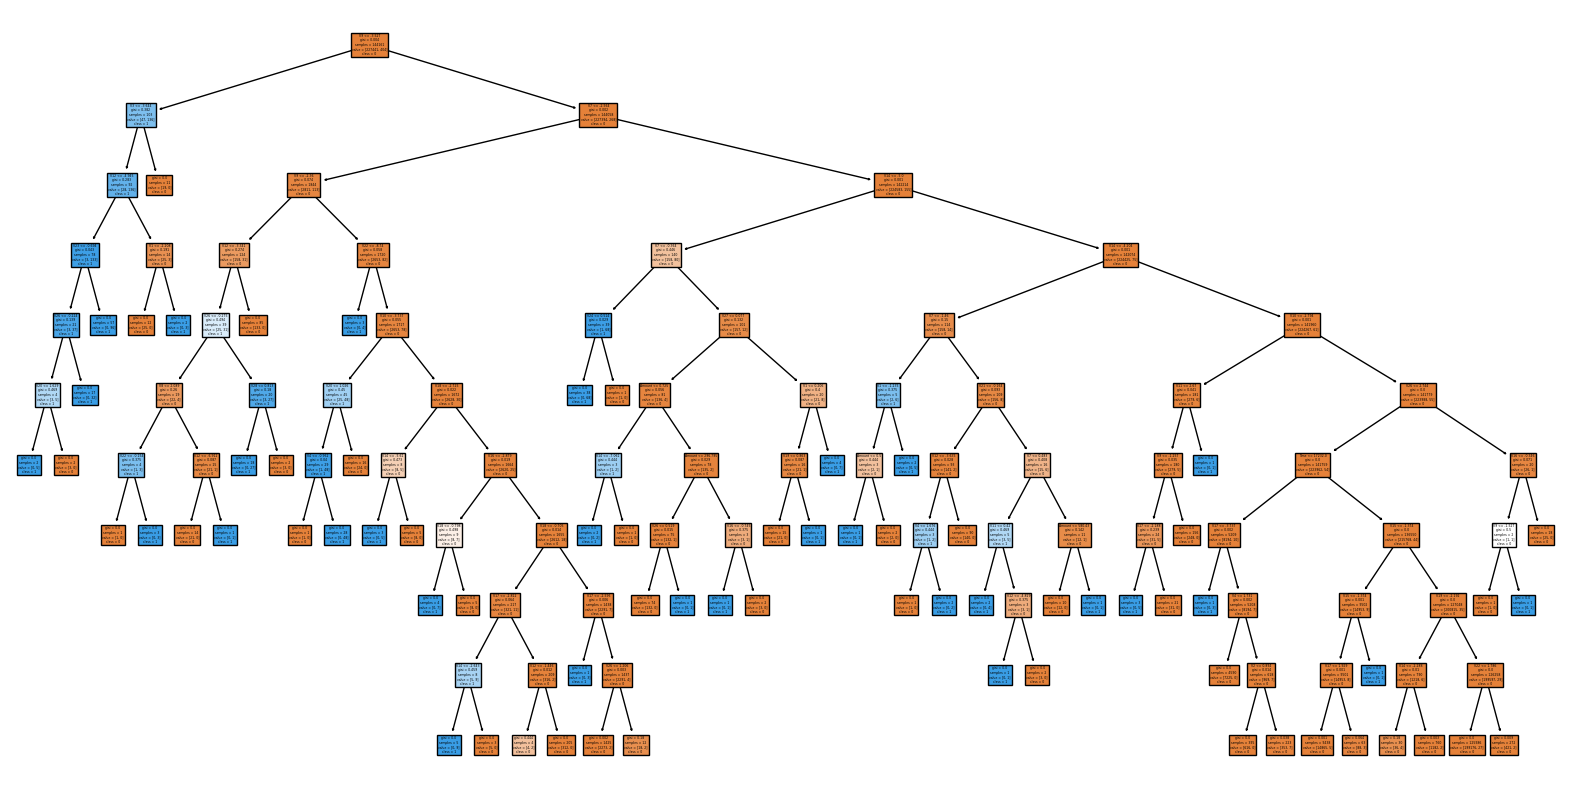

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()